### 1. Identify columns that contain a single value

In [3]:
### Uing Unique() function in Numpy 
from numpy import loadtxt
from numpy import unique

#Load dataset

data = loadtxt('oil-spill.csv',delimiter=",")

## Summarize the unique values in each column
for i in range(data.shape[1]):
    print(i , len(unique(data[:,i])))

##Column 22 has unique value...it should be removed

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [7]:
### A simple aproach is using nunique function in pandas
import pandas as pd

df = pd.read_csv('oil-spill.csv',header=None)

#Summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


#### Delete columns that contain unique values

In [10]:
#delete columns with single unique value
df = pd.read_csv('oil-spill.csv',header=None)

print(df.shape)

#Get the number of unique values for each column
counts = df.nunique()

#Get the columsn to be deleted

to_del = [i for i,v in enumerate(counts) if v==1]

print(to_del)

#drop the unique value columns

df.drop(to_del,axis=1,inplace=True)

print(df.shape)

(937, 50)
[22]
(937, 49)


### 2.Consider Columns that have very few values

In [16]:
##Summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique

#Loading the dataset
data = loadtxt("oil-spill.csv",delimiter=",")

#print the shape of the dataset
print(data.shape)

#Printing the percentage of unique values in each column
for i in range(data.shape[1]):
    unique_num = len(unique(data[:,i]))
    unique_pct = unique_num/data.shape[0] *100
    if unique_pct < 1:
        print("%d , %d ,%.1f%%"%(i,unique_num,unique_pct))

(937, 50)
21 , 9 ,1.0%
22 , 1 ,0.1%
24 , 9 ,1.0%
25 , 8 ,0.9%
26 , 9 ,1.0%
32 , 4 ,0.4%
36 , 3 ,0.3%
38 , 9 ,1.0%
39 , 9 ,1.0%
45 , 2 ,0.2%
49 , 2 ,0.2%


In [17]:
###If we want to delete the all columns with percentage less than 1

#loading data
df = pd.read_csv('oil-spill.csv',header=None)

print(df.shape)
#column wise unique counts
counts = df.nunique()

to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0] * 100) < 1]

print(to_del)

#deleting the columsn 
df.drop(to_del,axis=1,inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


### 3.Removing Columns that have a low variance

(937, 50)
(937, 49) (937,)
(937, 48)
> Threshold :.2f 0.000000eatures : 48
> Threshold :.2f 0.050000eatures : 37
> Threshold :.2f 0.100000eatures : 36
> Threshold :.2f 0.150000eatures : 35
> Threshold :.2f 0.200000eatures : 35
> Threshold :.2f 0.250000eatures : 35
> Threshold :.2f 0.300000eatures : 35
> Threshold :.2f 0.350000eatures : 35
> Threshold :.2f 0.400000eatures : 35
> Threshold :.2f 0.450000eatures : 33
> Threshold :.2f 0.500000eatures : 31


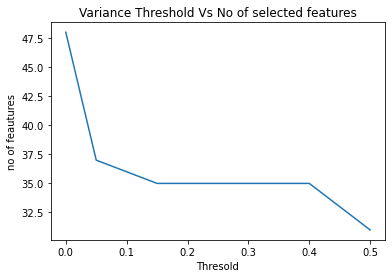

In [26]:
####Using VarianceThreshold from sckitLeanr

from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('oil-spill.csv',header=None)

print(df.shape)
data = df.values
#Split the data into inputs and outputs
X = data[:,:-1]
y = data[:,-1]

print(X.shape,y.shape)

#transform
transform = VarianceThreshold()

X_sel = transform.fit_transform(X)

print(X_sel.shape)

thresolds = np.arange(0,0.55,0.05)

results =  list()
for t in thresolds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    
    n_features = X_sel.shape[1]
    
    print('> Threshold :.2f% features : %d'%(t,n_features))
    
    results.append(n_features)

plt.plot(thresolds,results)
plt.title("Variance Threshold Vs No of selected features")
plt.xlabel("Thresold")
plt.ylabel("no of feautures")
plt.show()

### 4. Identify rows that contain Duplicate Data

In [27]:
df = pd.read_csv("iris.csv",header=None)

dups = df.duplicated()

#report if there any duplicates
print(dups.any())

#Printing duplicates
print(df[dups])


True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


#### 5.Deleting rows that contain duplicate data

In [28]:
print(df.shape)

df.drop_duplicates(inplace=True)

print(df.shape)

(150, 5)
(147, 5)
